In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="white")
dataset = fetch_openml("mnist_784", version=1)
# dataset = fetch_openml("Fashion-MNIST", version=1)

2024-11-03 10:11:58.752798: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-03 10:11:58.784209: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-03 10:11:59.648121: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/krzysiek/anaconda3/envs/ml3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. T

In [3]:
import nano_umap

In [4]:
import numpy as np

def draw_embeddings(embedding: np.ndarray, title: str):
    fig, ax = plt.subplots(figsize=(7, 7))
    color = dataset.target.astype(int)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1)
    plt.setp(ax, xticks=[], yticks=[])
    plt.title(title, fontsize=18)
    plt.show()


def compare_with_umap(umap_embedding: np.ndarray, embedding: np.ndarray, title: str):
    fig, ax = plt.subplots(figsize=(14, 7))
    color = dataset.target.astype(int)
    plt.subplot(1, 2, 1)
    plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=color, cmap="Spectral", s=0.1)
    plt.setp(ax, xticks=[], yticks=[])
    plt.title("UMAP", fontsize=14)
    plt.subplot(1, 2, 2)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1)
    plt.setp(ax, xticks=[], yticks=[])
    plt.title(title, fontsize=14)
    plt.show()

UMAP(n_jobs=1, verbose=True)
Sun Nov  3 10:12:27 2024 Construct fuzzy simplicial set
Sun Nov  3 10:12:28 2024 Finding Nearest Neighbors
Sun Nov  3 10:12:28 2024 Building RP forest with 18 trees
Sun Nov  3 10:12:33 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Sun Nov  3 10:14:36 2024 Finished Nearest Neighbor Search
Sun Nov  3 10:14:38 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun Nov  3 10:15:11 2024 Finished embedding


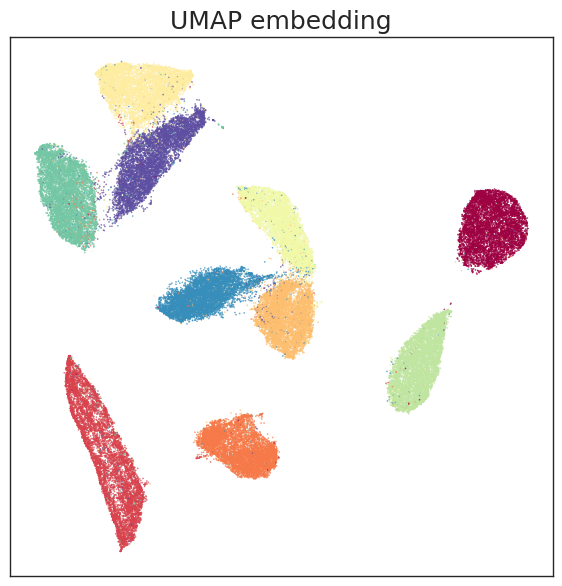

In [5]:
reducer = umap.UMAP(verbose=True, n_jobs=1)
umap_embedding = reducer.fit_transform(dataset.data)
draw_embeddings(umap_embedding, "UMAP embedding")

INFO:nano_umap.core:Building Usearch KNN index for dataset of shape (70000, 784)


Sun Nov  3 10:15:12 2024 Building RP forest with 18 trees
Sun Nov  3 10:15:15 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations


INFO:nano_umap.core:Initializing embedding with random
Optimizing: 100%|██████████| 200/200 [00:20<00:00,  9.76it/s]
/tmp/ipykernel_235282/68694542.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


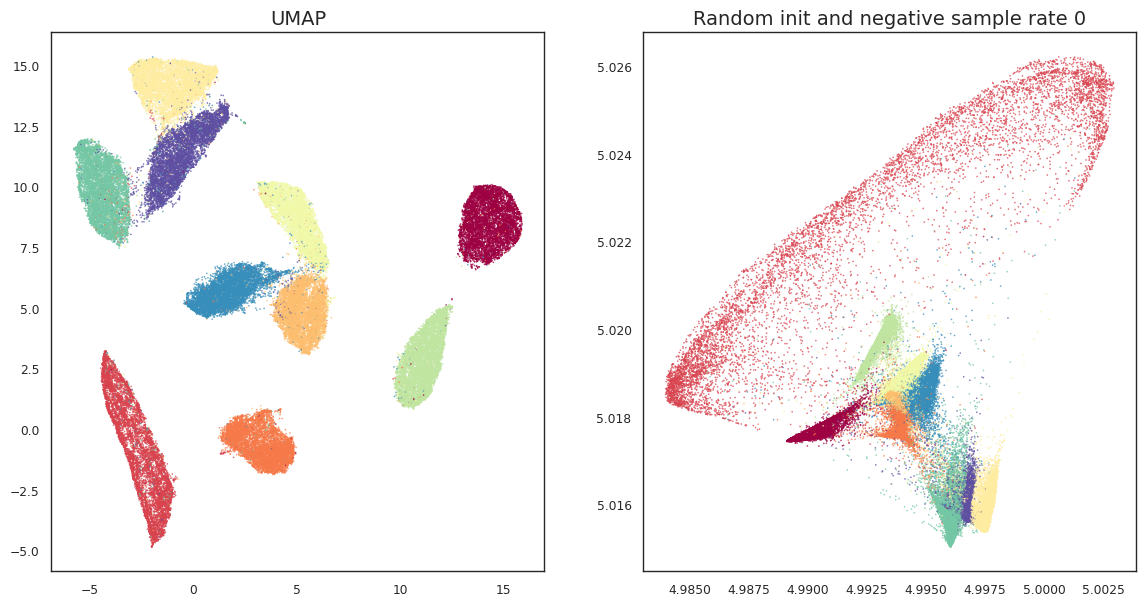

In [6]:
nano_reducer = nano_umap.NanoUMAPV0(verbose=True, n_jobs=1, init="random")
nano_embedding = nano_reducer.fit_transform(dataset.data)
compare_with_umap(umap_embedding, nano_embedding, "Random init and negative sample rate 0")

INFO:nano_umap.core:Building Usearch KNN index for dataset of shape (70000, 784)


Sun Nov  3 10:16:59 2024 Building RP forest with 18 trees
Sun Nov  3 10:17:02 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations


INFO:nano_umap.core:Initializing embedding with random
Optimizing: 100%|██████████| 200/200 [00:33<00:00,  6.00it/s]
/tmp/ipykernel_235282/68694542.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


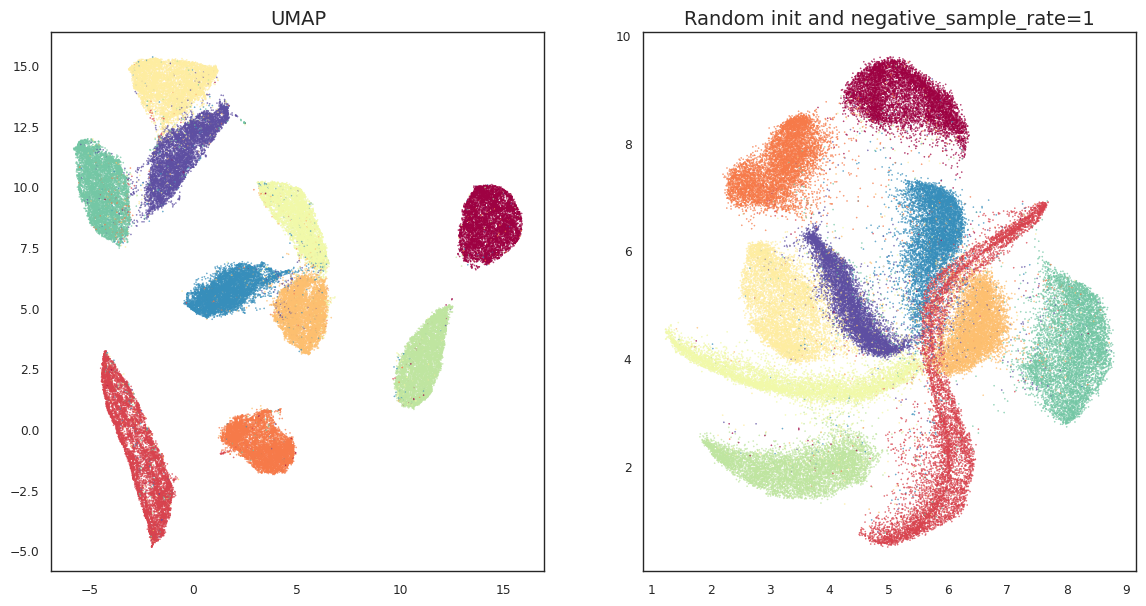

In [7]:
# n_neighbors * negative_sample_rate - will be the number of negative samples for single point
nano_reducer = nano_umap.NanoUMAPV1(verbose=True, n_jobs=1, init="random", negative_sample_rate=1)
nano_embedding = nano_reducer.fit_transform(dataset.data)
compare_with_umap(umap_embedding, nano_embedding, "Random init and negative_sample_rate=1")

INFO:nano_umap.core:Building Usearch KNN index for dataset of shape (70000, 784)


Sun Nov  3 10:17:44 2024 Building RP forest with 18 trees
Sun Nov  3 10:17:47 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations


INFO:nano_umap.core:Initializing embedding with UMAP spectral initialization
Optimizing: 100%|██████████| 200/200 [00:32<00:00,  6.20it/s]
/tmp/ipykernel_235282/68694542.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


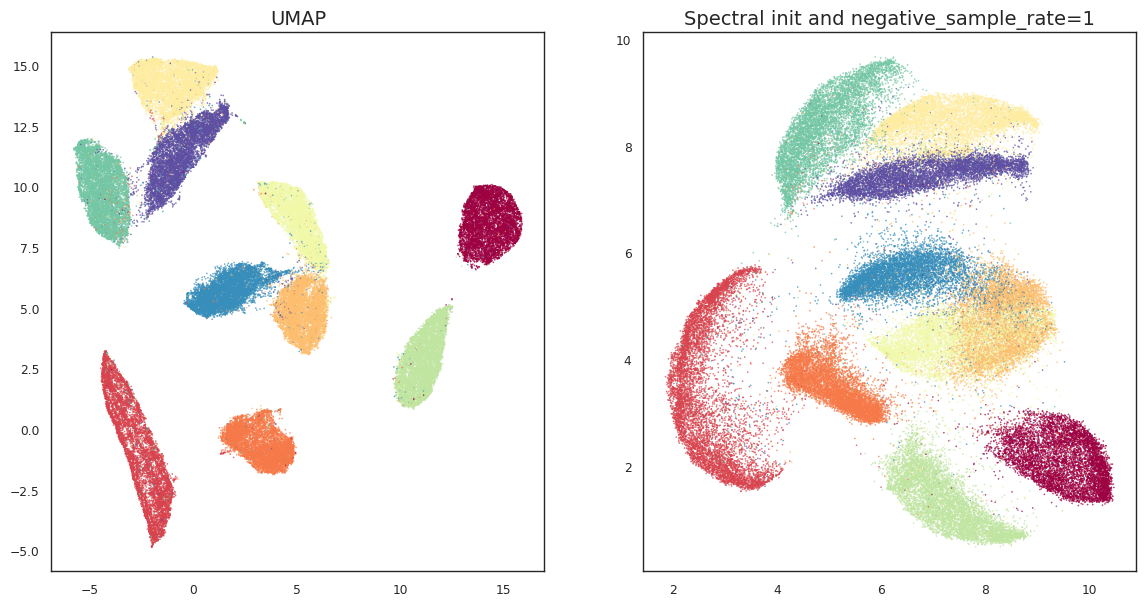

In [8]:
nano_reducer = nano_umap.NanoUMAPV1(verbose=True, n_jobs=1, init="spectral", negative_sample_rate=1)
nano_embedding = nano_reducer.fit_transform(dataset.data)
compare_with_umap(umap_embedding, nano_embedding, "Spectral init and negative_sample_rate=1")

INFO:nano_umap.core:Building Usearch KNN index for dataset of shape (70000, 784)


Sun Nov  3 10:18:33 2024 Building RP forest with 18 trees
Sun Nov  3 10:18:36 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations


INFO:nano_umap.core:Initializing embedding with UMAP spectral initialization
Optimizing: 100%|██████████| 200/200 [00:21<00:00,  9.22it/s]
/tmp/ipykernel_235282/68694542.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


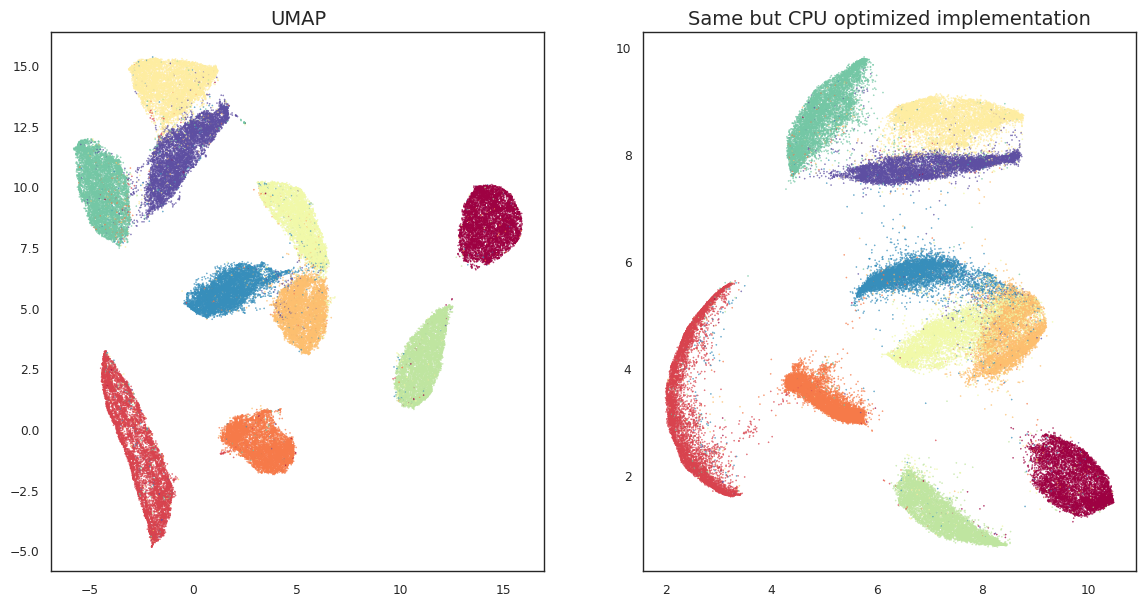

In [9]:
nano_reducer = nano_umap.NanoUMAPV1Optimized(verbose=True, n_jobs=1, init="spectral", negative_sample_rate=1)
nano_embedding = nano_reducer.fit_transform(dataset.data)
compare_with_umap(umap_embedding, nano_embedding, "Same but CPU optimized implementation")

INFO:nano_umap.core:Building Usearch KNN index for dataset of shape (70000, 784)


Sun Nov  3 10:19:11 2024 Building RP forest with 18 trees
Sun Nov  3 10:19:14 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations


INFO:nano_umap.core:Initializing embedding with UMAP spectral initialization
Optimizing: 100%|██████████| 200/200 [00:21<00:00,  9.42it/s]
/tmp/ipykernel_235282/68694542.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


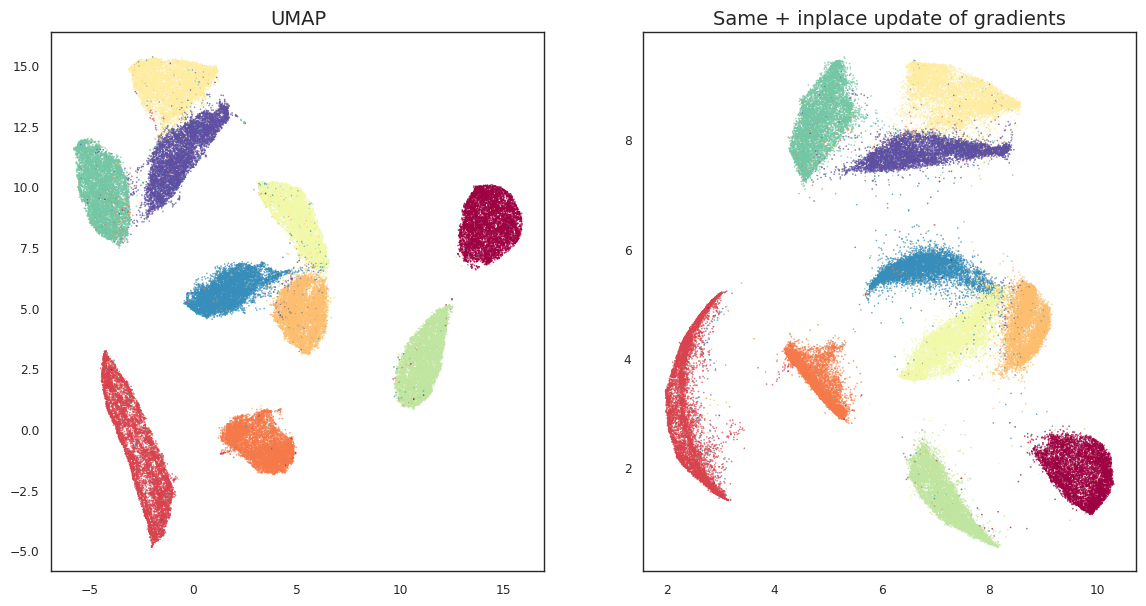

In [10]:
nano_reducer = nano_umap.NanoUMAPV2(verbose=True, n_jobs=1, init="spectral", negative_sample_rate=1)
nano_embedding = nano_reducer.fit_transform(dataset.data)
compare_with_umap(umap_embedding, nano_embedding, "Same + inplace update of gradients")

INFO:nano_umap.core:Building Usearch KNN index for dataset of shape (70000, 784)


Sun Nov  3 10:22:20 2024 Building RP forest with 18 trees
Sun Nov  3 10:22:23 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations


INFO:nano_umap.core:Initializing embedding with UMAP spectral initialization
Optimizing: 100%|██████████| 200/200 [00:56<00:00,  3.56it/s]
/tmp/ipykernel_235282/68694542.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


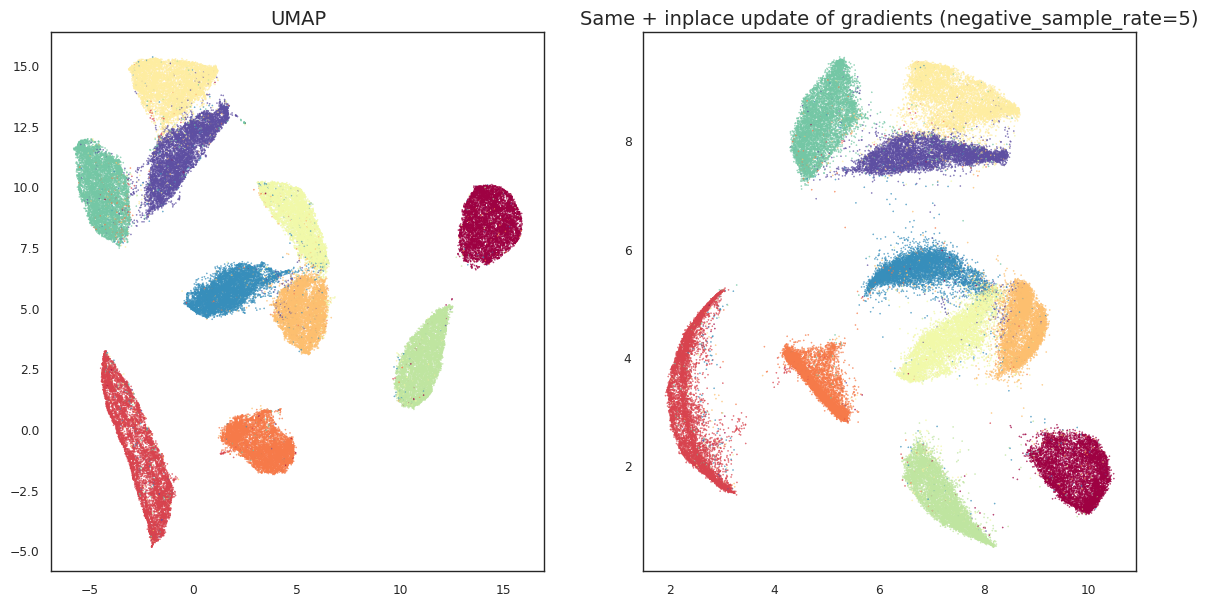

In [14]:
nano_reducer = nano_umap.NanoUMAPV2(verbose=True, n_jobs=1, init="spectral", negative_sample_rate=5)
nano_embedding = nano_reducer.fit_transform(dataset.data)
compare_with_umap(umap_embedding, nano_embedding, "Same + inplace update of gradients (negative_sample_rate=5)")

INFO:nano_umap.core:Building Usearch KNN index for dataset of shape (70000, 784)


Sun Nov  3 10:19:49 2024 Building RP forest with 18 trees
Sun Nov  3 10:19:52 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations


INFO:nano_umap.core:Initializing embedding with UMAP spectral initialization
Optimizing: 100%|██████████| 200/200 [00:42<00:00,  4.75it/s]
/tmp/ipykernel_235282/68694542.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


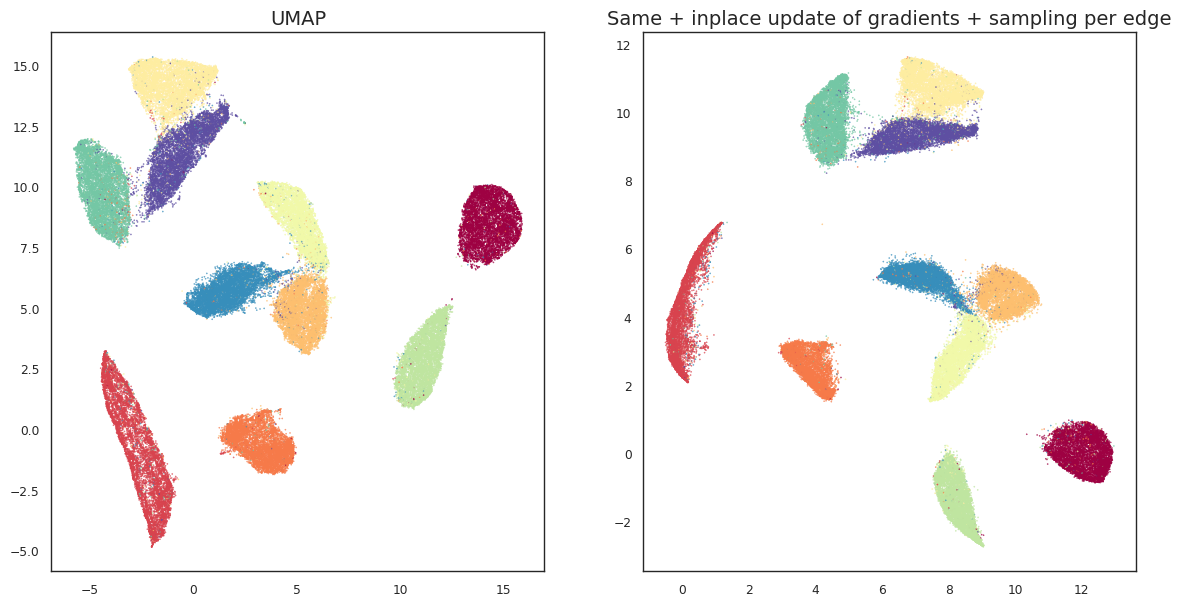

In [11]:
nano_reducer = nano_umap.NanoUMAPV3(verbose=True, n_jobs=1, init="spectral", negative_sample_rate=2)
nano_embedding = nano_reducer.fit_transform(dataset.data)
compare_with_umap(umap_embedding, nano_embedding, "Same + inplace update of gradients + sampling per edge")

INFO:nano_umap.core:Building Usearch KNN index for dataset of shape (70000, 784)


Sun Nov  3 10:25:58 2024 Building RP forest with 18 trees
Sun Nov  3 10:26:01 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations


INFO:nano_umap.core:Initializing embedding with UMAP spectral initialization
Optimizing: 100%|██████████| 200/200 [00:16<00:00, 12.36it/s]
/tmp/ipykernel_235282/68694542.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


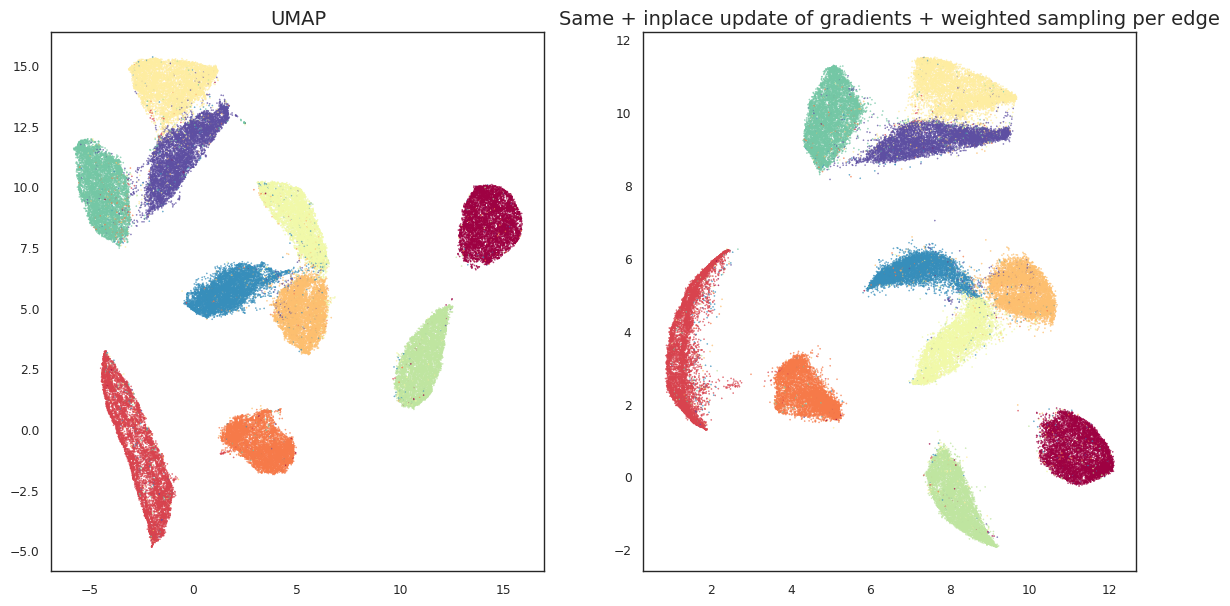

In [16]:
nano_reducer = nano_umap.NanoUMAPV4(verbose=True, n_jobs=1, init="spectral", negative_sample_rate=2)
nano_embedding = nano_reducer.fit_transform(dataset.data)
compare_with_umap(umap_embedding, nano_embedding, "Same + inplace update of gradients + weighted sampling per edge")

INFO:nano_umap.core:Building Usearch KNN index for dataset of shape (70000, 784)


Sun Nov  3 10:21:26 2024 Building RP forest with 18 trees
Sun Nov  3 10:21:28 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations


INFO:nano_umap.core:Initializing embedding with UMAP spectral initialization
Optimizing: 100%|██████████| 200/200 [00:31<00:00,  6.29it/s]
/tmp/ipykernel_235282/68694542.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


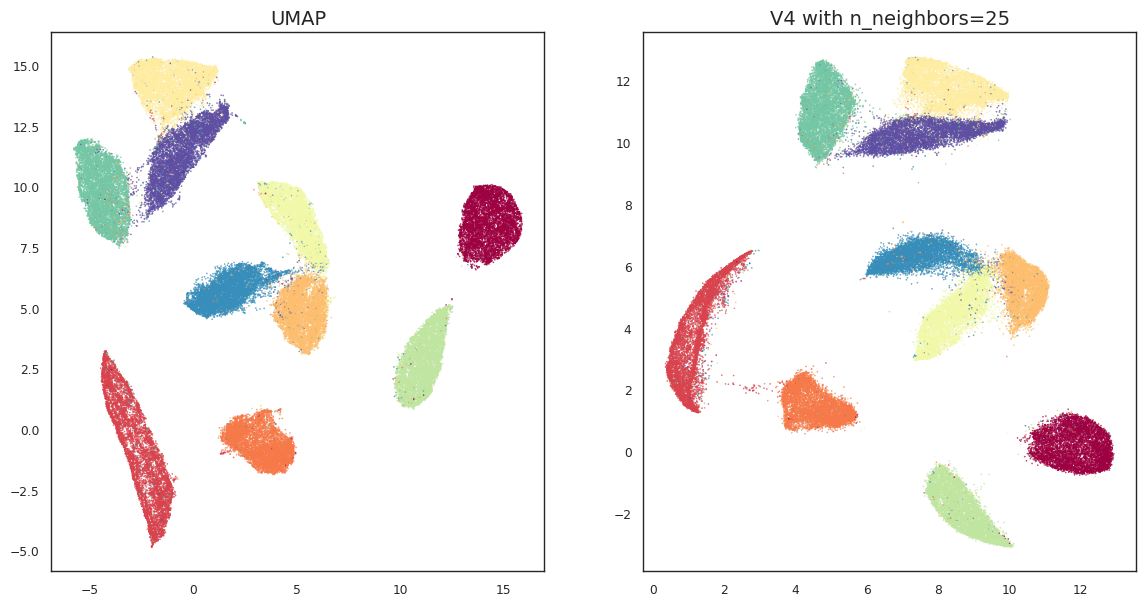

In [13]:
nano_reducer = nano_umap.NanoUMAPV4(verbose=True, n_neighbors=25, n_jobs=1, init="spectral", negative_sample_rate=3)
nano_embedding = nano_reducer.fit_transform(dataset.data)
compare_with_umap(umap_embedding, nano_embedding, "V4 with n_neighbors=25")

In [4]:
from nano_umap import core
import numpy as np
core.make_epochs_per_sample(np.array([1, 2, 3, 4, 5]), 100)

array([5.        , 2.5       , 1.66666667, 1.25      , 1.        ])